In [33]:
# !pip install --no-input sklearn
# !pip3 install --no-input sklearn
# !pip install --no-input pandas
# !pip install --no-input seaborn
# !pip3 install --no-input seaborn
!pip3 install --no-input statsmodels

     |████████████████████████████████| 9.5 MB 2.3 MB/s 
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
You should consider upgrading via the '/Users/maxim/opt/anaconda3/envs/jupyter_docs/bin/python -m pip install --upgrade pip' command.


In [3]:
from sklearn import datasets

boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/maxim/opt/anaconda3/envs/jupyter_docs/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

In [24]:
import pandas as pd
df = pd.DataFrame(boston.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## 3.5.1. Remove highly correlated variables

<AxesSubplot:>

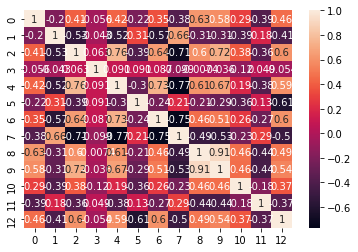

In [26]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

# TODO: ask if 8 should be removed

<AxesSubplot:>

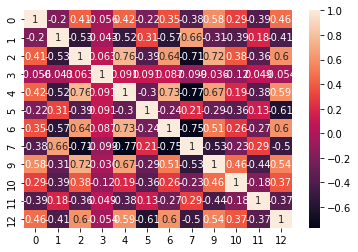

In [27]:
df_mod = df.copy(deep=True)
df_mod.drop(columns=8, inplace=True)

sns.heatmap(df_mod.corr(), annot=True)

## 3.5.2. Select significant features

### Train/test split

In [31]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

X = df_mod
y = pd.DataFrame(boston.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
X_train.sort_index().tail()

,0,1,2,3,4,5,6,7,9,10,11,12
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,391.0,19.2,395.77,15.10
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,273.0,21.0,396.90,7.88


### Lineal regression model

In [38]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y_train, X_train)
f = logit.fit()
f.params

ValueError: endog must be in the unit interval.

In [ ]:
f.summary()